In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
rows_interval = 4
rows_min = rows_interval
rows_max = 16
rows = int(rows_max/rows_interval) - int(rows_min/rows_interval) + 1

row_space = list(range(rows_min, rows_max + 1, rows_interval))
scalar_space = [1000, 10000, 100000]

columns = 3

ns_conversion_factor = 1e-6 # ns to ms

In [52]:
operation = "op_n"
precision = 32
median_array_op_n_32 = np.zeros((rows, columns))

# load data
for i, n in enumerate(row_space):
    for j, m in enumerate([n*1000, n*10000, n*100000]):
        try:
            directoryname = f"../blas_results/gemm_{operation}_{precision}/{n}_{m}"
            filename = "results.csv"
            df = pd.read_csv(f"{directoryname}/{filename}", usecols=["BeginNs", "EndNs"])
            subtracted_df = df["EndNs"] - df["BeginNs"]
            subtracted_array = subtracted_df.to_numpy()
            median_array_op_n_32[i, j] = np.median(subtracted_array) * ns_conversion_factor
        except:
            print(n,m)

In [53]:
operation = "op_n"
precision = 64
median_array_op_n_64 = np.zeros((rows, columns))

# load data
for i, n in enumerate(row_space):
    for j, m in enumerate([n*1000, n*10000, n*100000]):
        try:
            directoryname = f"../blas_results/gemm_{operation}_{precision}/{n}_{m}"
            filename = "results.csv"
            df = pd.read_csv(f"{directoryname}/{filename}", usecols=["BeginNs", "EndNs"])
            subtracted_df = df["EndNs"] - df["BeginNs"]
            subtracted_array = subtracted_df.to_numpy()
            median_array_op_n_64[i, j] = np.median(subtracted_array) * ns_conversion_factor
        except:
            print(n,m)

In [54]:
operation = "op_t"
precision = 32
median_array_op_t_32 = np.zeros((rows, columns))

# load data
for i, n in enumerate(row_space):
    for j, m in enumerate([n*1000, n*10000, n*100000]):
        try:
            directoryname = f"../blas_results/gemm_{operation}_{precision}/{n}_{m}"
            filename = "results.csv"
            df = pd.read_csv(f"{directoryname}/{filename}", usecols=["BeginNs", "EndNs"])
            subtracted_df = df["EndNs"] - df["BeginNs"]
            subtracted_array = subtracted_df.to_numpy()
            median_array_op_t_32[i, j] = np.median(subtracted_array) * ns_conversion_factor
        except:
            print(n,m)

In [55]:
operation = "op_t"
precision = 64
median_array_op_t_64 = np.zeros((rows, columns))

# load data
for i, n in enumerate(row_space):
    for j, m in enumerate([n*1000, n*10000, n*100000]):
        try:
            directoryname = f"../blas_results/gemm_{operation}_{precision}/{n}_{m}"
            filename = "results.csv"
            df = pd.read_csv(f"{directoryname}/{filename}", usecols=["BeginNs", "EndNs"])
            subtracted_df = df["EndNs"] - df["BeginNs"]
            subtracted_array = subtracted_df.to_numpy()
            median_array_op_t_64[i, j] = np.median(subtracted_array) * ns_conversion_factor
        except:
            print(n,m)

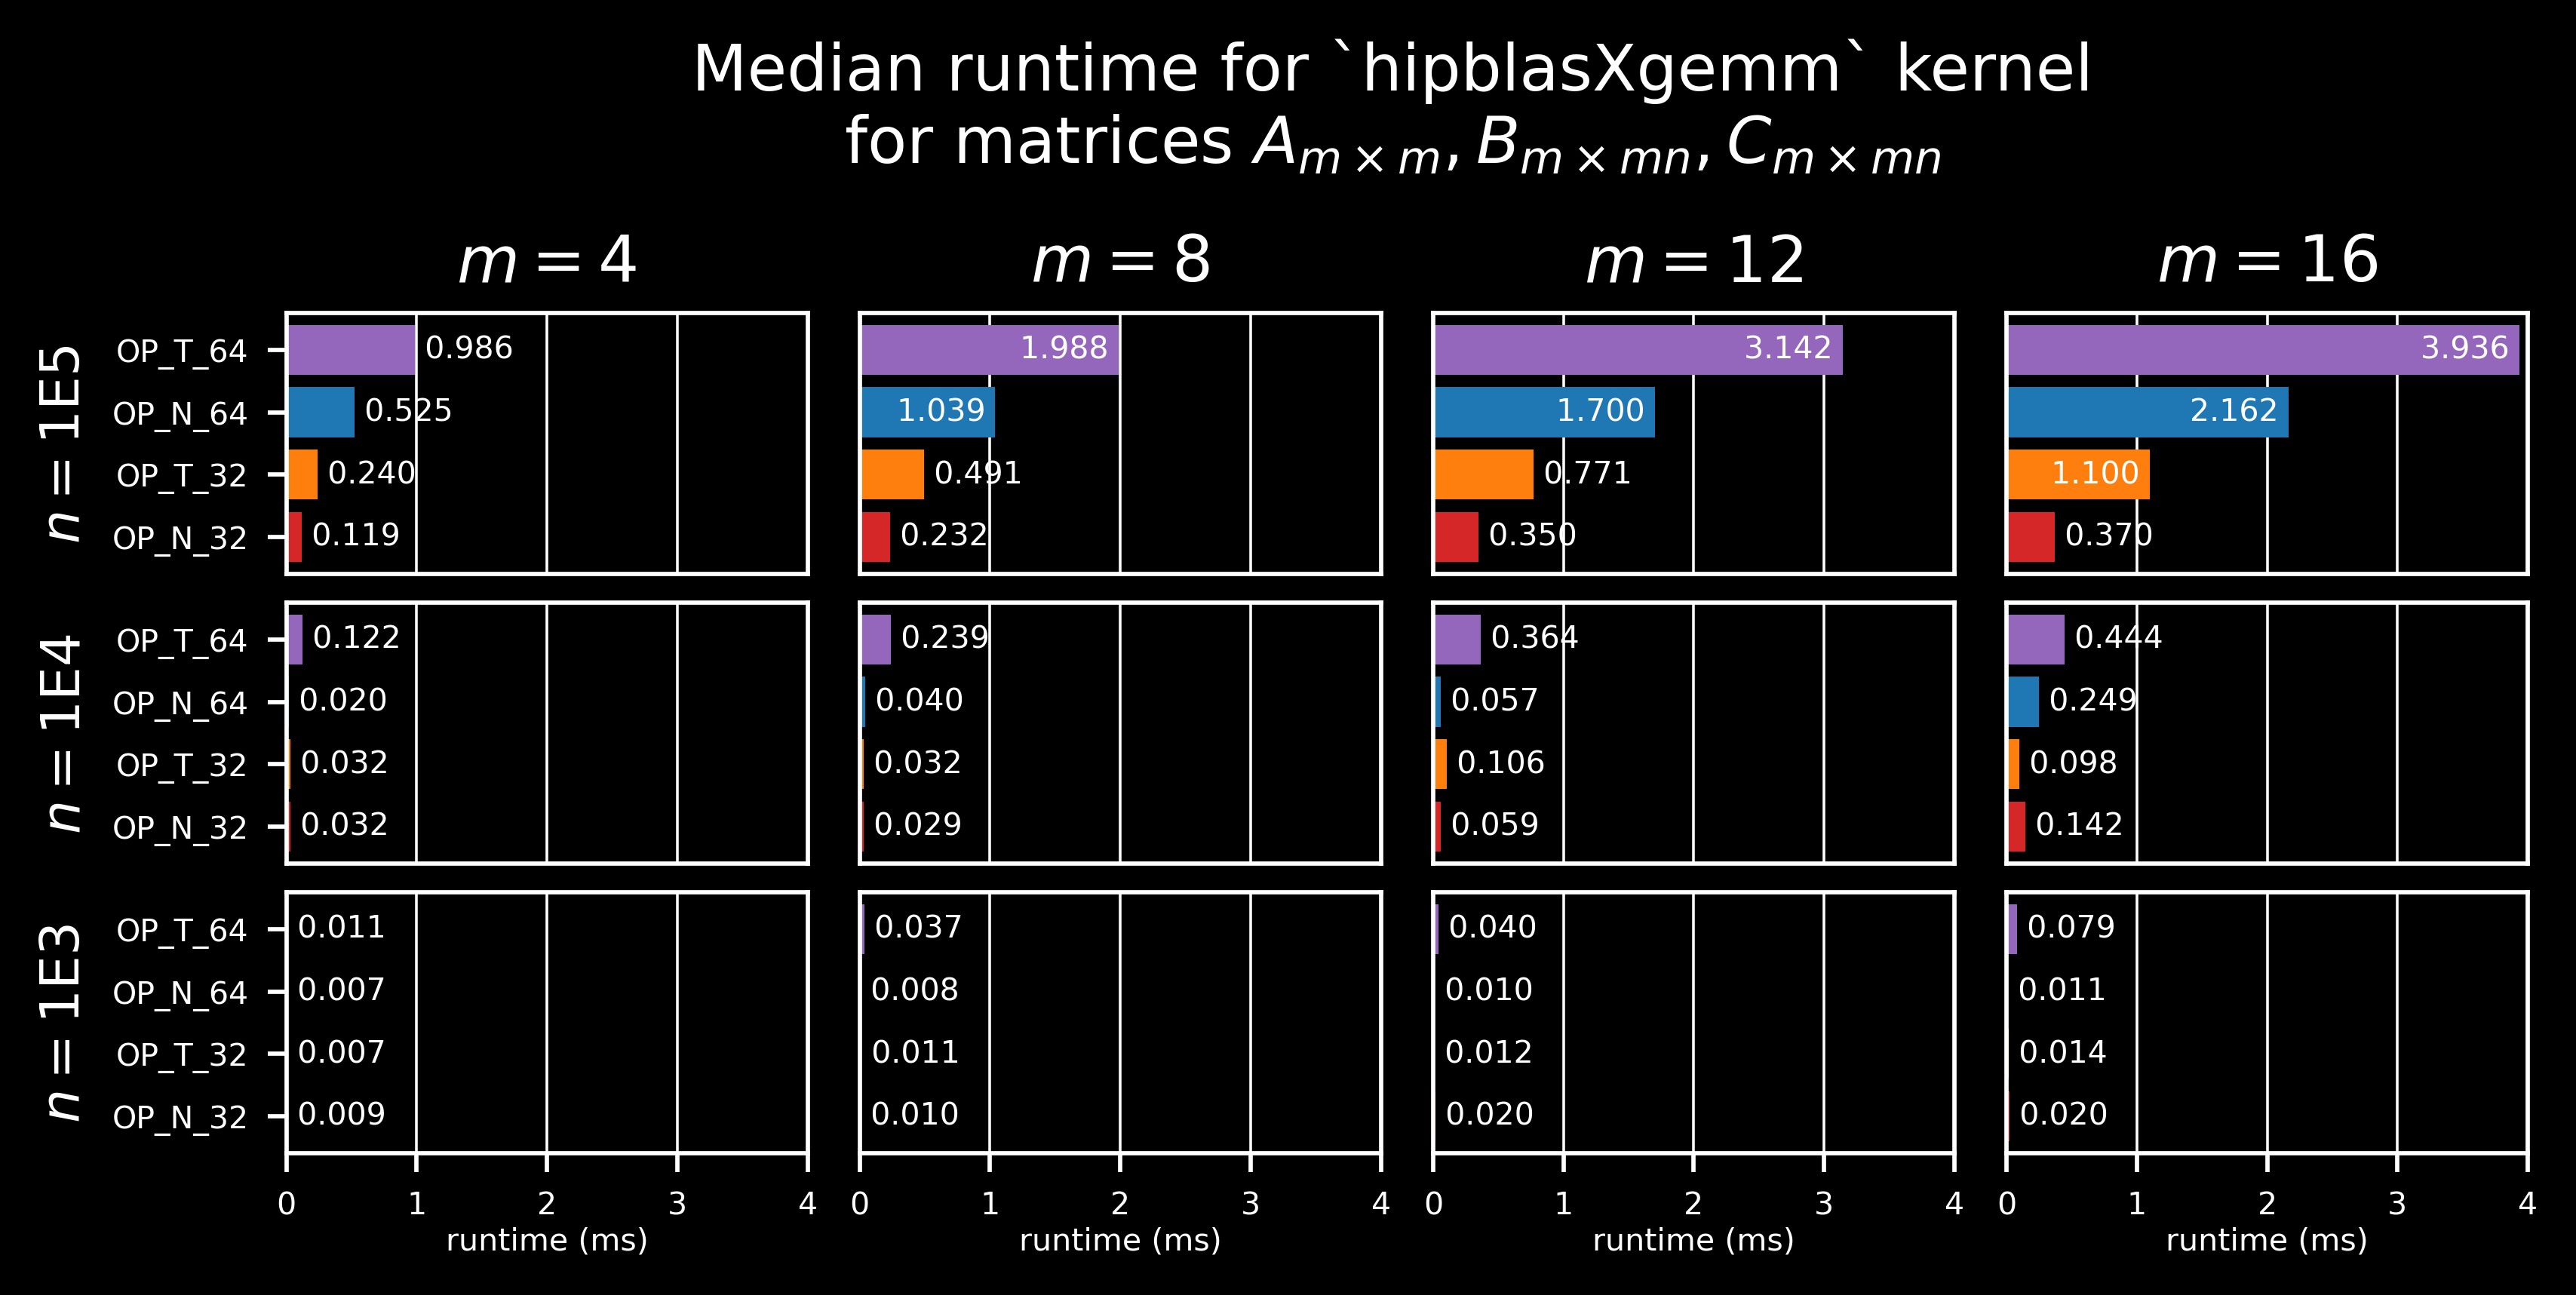

In [56]:
import matplotlib.patches as mpatches
plt.style.use('dark_background')

titles = ["OP_N_32", "OP_T_32", "OP_N_64", "OP_T_64"]
median_arrays = [median_array_op_n_32, median_array_op_t_32, median_array_op_n_64, median_array_op_t_64]

fig, axes = plt.subplots(
    median_arrays[0].shape[1],
    median_arrays[0].shape[0], 
    subplot_kw=dict(box_aspect=1/2),
    sharex=True,
    sharey=True,
    #layout="constrained",
    dpi=512,
)
fig.tight_layout()

custom_wspace=0.1
custom_hspace=-0.75
plt.subplots_adjust(wspace=custom_wspace, hspace=custom_hspace)

y_pos = np.arange(median_arrays[0].shape[0])
width = 0.25

bar_colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:purple']
xlim = 4

# Row labels
for i in range(median_arrays[0].shape[1]):
    k = median_arrays[0].shape[1] - i + 2
    axes[i, 0].set_ylabel(
        fr"$n=1\mathrm{{E}}{k}$",
        fontsize="medium",
        #weight="bold",
    )

for i, m in enumerate(row_space):
    for j, m_scalar in enumerate(scalar_space):
        ax = axes[len(scalar_space) - j - 1,i]
        ax.set_axisbelow(True)
        ms = [median_array[i][j] for median_array in median_arrays]
        rects = ax.barh(titles, ms, label=titles, color=bar_colors)
        ax.grid(which="both", axis="x", linewidth='0.5')
        #plt.grid(which='minor', linestyle=':', linewidth='0.5')
        ax.set_xlim(0, xlim)
        ax.set_xticks(range(0,xlim+1, int(xlim/4)))
        ax.set_xticklabels(
            range(0,xlim+1, int(xlim/4)),
            fontsize="xx-small",
        )
        ax.set_yticks(
            ticks=y_pos,
            labels=titles,
            minor=False,
            fontsize="xx-small",
        )
        # Add column units (bottom)
        if j == 0:
            ax.set_xlabel(
                "runtime (ms)",
                # "runtmie (μs)",
                fontsize="xx-small",
            )
            ax.xaxis.set_label_coords(0.5, 0.375*custom_hspace)
        else:
            ax.xaxis.set_ticks_position('none') 
        # Add column labels (top)
        if j == median_arrays[0].shape[1] - 1:
            ax.set_xlabel(
                fr"$m = {row_space[i]}$",
                position=(0.5,0.0),
                fontsize="large",
            )
            ax.xaxis.set_label_coords(0.5, -1.75*custom_hspace)
        if i > 0:
            ax.yaxis.set_ticks_position('none') 
            
        for y in y_pos:
            if ms[y] < 1:
                ax.text(
                    ms[y], 
                    y, 
                    f" {ms[y]:.3f}", 
                    ha="left", 
                    va="center", 
                    fontsize="xx-small",
                    #bbox=dict(facecolor='black', edgecolor='none', pad=0.01)
                )
            else:
                ax.text(
                    ms[y], 
                    y, 
                    f"{ms[y]:.3f} ", 
                    ha="right", 
                    va="center", 
                    fontsize="xx-small",
                )

# Legend
patches = []

for k, title in enumerate(titles):
    patches.append(mpatches.Patch(color=bar_colors[k], label=title))

#fig.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)
fig.suptitle(
    "Median runtime for `hipblasXgemm` kernel" + '\n' + r"for matrices $A_{m \times m}, B_{m \times mn}, C_{m \times mn}$", 
    x=0.5, 
    y=0.875
)

plt.show()